# Global Food Production (Modeling)

In general, the majority of this capstone was in exploring the data and finding insights about food production through graphing and statistical methods. Creating plots for top producing country's, top produced food items, and population changes were the main focus of the work. 

However, we will also create a KMeans clustering model to group our data based on food production, partitioning the 174 original country's into $k$ clusters. We will want to use the elbow method in selecting our number of clusters, with an initial guess of using 2 to 3 cluster to separate countries based on high and low production.

In [1]:
# import general libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import model libraries
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

# set style parameters for graphs
sns.set_style("darkgrid", {'axes.edgecolor': 'black'})
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams["legend.edgecolor"] = 'black'
plt.rcParams["legend.fontsize"] = 13

In [2]:
prod = pd.read_csv('FAO_FOOD_STAT.csv')
pop = pd.read_csv('FAO_POP_REFORMAT.csv')

x = pop.iloc[:, 2:].sum(axis=0).values

y = prod.iloc[:, 10:].sum(axis=0).values

x_train = x.reshape(-1,1)

## 1: Simple Linear Model

From our findings in the previous notebook, we noticed that yearly global population and yearly global production have a linear relationship. Using the estiamted global population as the independent variable (y) and the global production as the dependent variable (x), we will estimate the total production that is expected given a total population value. This will allow us to see what the necessary production would be to support a given population number, which we will use to extrapolate and use on the 2050 population estiamte of 9.7 billion.

In [3]:
model = LinearRegression().fit(x_train,y)

pop_2050 = [9700000]

train_preds = model.predict(x_train)
prod_simple_2050 = model.predict([pop_2050])

In [4]:
rmse = round(np.sqrt(mean_squared_error(y, train_preds)), 2)
print(f'RMSE: {rmse}')
print(f'2050 Production Estimate: {round(prod_simple_2050[0],3)}')

RMSE: 405017.06
2050 Production Estimate: 16938972.602


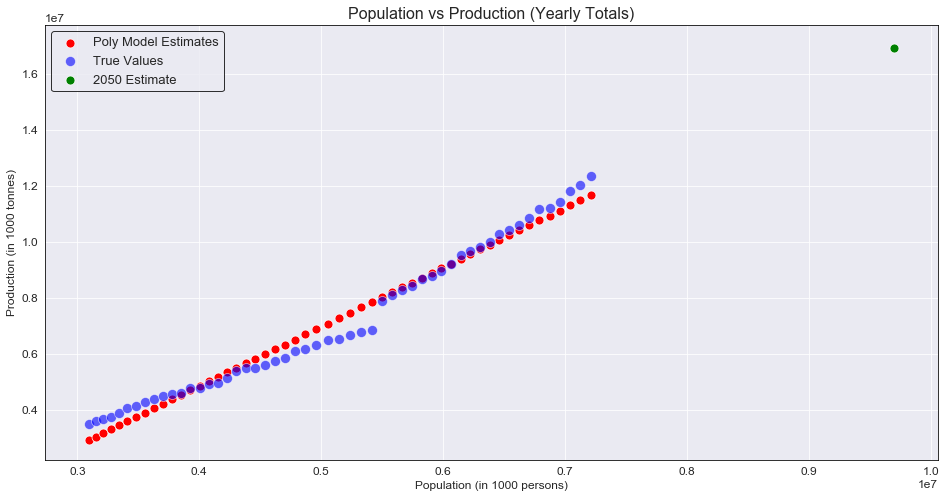

In [5]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=x, y=train_preds, color='red', s=80, label='Poly Model Estimates')
sns.scatterplot(x=x, y=y, color='blue', s=100, alpha=0.6, label='True Values')
sns.scatterplot(x=pop_2050[0], y=prod_simple_2050, s=80, color='green', label='2050 Estimate')
plt.title('Population vs Production (Yearly Totals)')
plt.xlabel('Population (in 1000 persons)')
plt.ylabel('Production (in 1000 tonnes)')
plt.show();

## 2: Second Order Linear Model

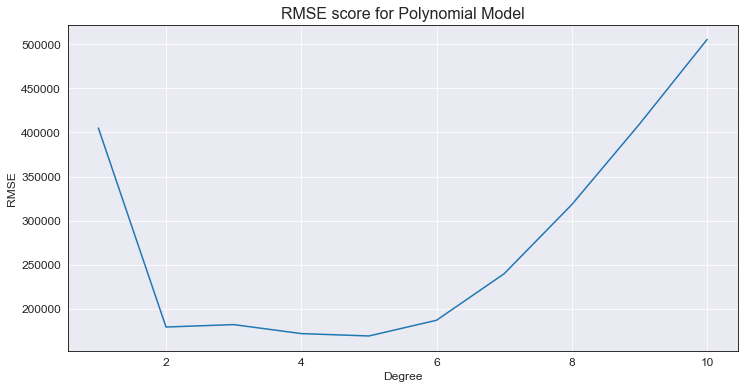

In [9]:
rmse_scores = []
degree_range = np.arange(1,11)

for deg in degree_range:
    poly_features = PolynomialFeatures(degree=deg)
    X_poly = poly_features.fit_transform(x_train)
    
    poly_model = LinearRegression().fit(X_poly, y)
    train_preds = poly_model.predict(X_poly)
    rmse = round(np.sqrt(mean_squared_error(y, train_preds)), 2)
    rmse_scores.append(rmse)

plt.figure(figsize=(12,6))
sns.lineplot(x=degree_range, y=rmse_scores)
plt.title('RMSE score for Polynomial Model')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.show();

In [17]:
poly_feat = PolynomialFeatures(degree=2)
X_poly = poly_feat.fit_transform(x_train)

poly_model = LinearRegression().fit(X_poly, y)

pop_2050 = [[9700000]]
poly_2050 = poly_feat.fit_transform(pop_2050)

train_preds = poly_model.predict(X_poly)
prod_poly_2050 = poly_model.predict(poly_2050)

In [18]:
rmse = round(np.sqrt(mean_squared_error(y, train_preds)), 2)
print(f'RMSE: {rmse}')
print(f'2050 Production Estimate: {round(prod_poly_2050[0],3)}')

RMSE: 179427.41
2050 Production Estimate: 22300852.093


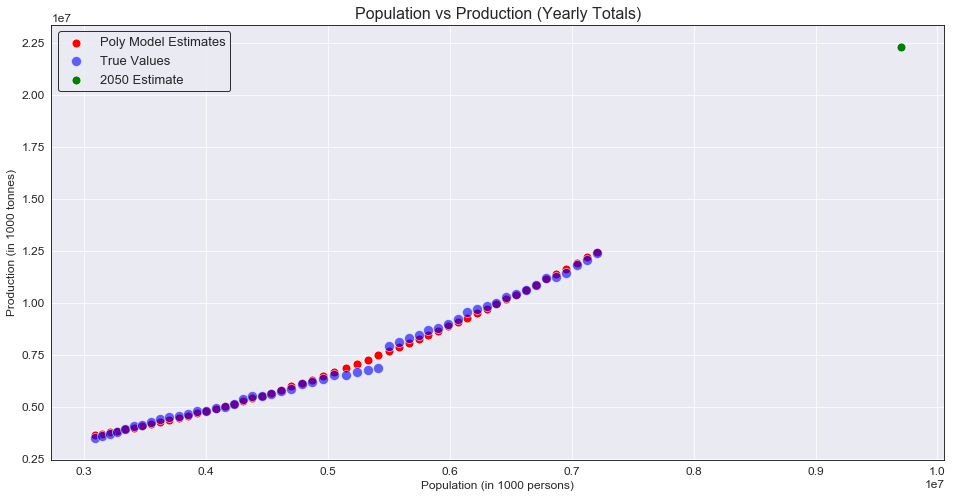

In [19]:
plt.figure(figsize=(16,8))
sns.scatterplot(x=x, y=train_preds, color='red', s=80, label='Poly Model Estimates')
sns.scatterplot(x=x, y=y, color='blue', s=100, alpha=0.6, label='True Values')
sns.scatterplot(x=pop_2050[0][0], y=prod_poly_2050, s=80, color='green', label='2050 Estimate')
plt.title('Population vs Production (Yearly Totals)')
plt.xlabel('Population (in 1000 persons)')
plt.ylabel('Production (in 1000 tonnes)')
plt.show();